In [1]:
# Import packages
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns
sns.set()


In [2]:
# Read merged.csv into dataframe
df = pd.read_csv('clean_df.csv', index_col=0)


C:\Users\AnthonyLin\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Annual Income

__Questions & Trends Explored:__ I first explored the distribution of annual incomes to understand the types of borrowers in peer-to-peer loans.


In [3]:
# Examine quantiles of annual income
df.annual_inc.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])


0.00            0.0
0.10        34000.0
0.20        42000.0
0.30        50000.0
0.40        58000.0
0.50        65000.0
0.60        75000.0
0.70        85464.6
0.80       100000.0
0.90       130000.0
0.95       162500.0
0.99       275000.0
1.00    110000000.0
Name: annual_inc, dtype: float64

In [4]:
# Examine annual income outliers
pd.set_option('display.max_columns', None)
df[df.annual_inc > 1000000].sort_values(by=['annual_inc'])


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,status_grp,emp_length_grp,home_ownership_grp,zip_code_median_income,income_vs_peers
1162448,36000.0,36000.0,36000.0,60 months,0.1399,837.48,C,C3,Manager,10+ years,MORTGAGE,1000001.0,Source Verified,2016-08-01,Fully Paid,n,debt_consolidation,Debt consolidation,131xx,NY,1.86,0.0,1999-10-01,0.0,25.0,0.0,38884.0,0.379,35.0,w,0.00,0.00,45743.599347,45743.60,36000.00,9743.60,0.00,0.00,0.0000,2018-12-01,23159.62,2019-06-01,0.0,1,Individual,0.0,0.0,117183.0,102700.0,17.0,4883.0,38715.0,42.2,0.0,0.0,136.0,202.0,2.0,2.0,3.0,2.0,18.0,0.0,6.0,10.0,12.0,14.0,5.0,22.0,27.0,10.0,25.0,0.0,0.0,0.0,2.0,100.0,8.3,0.0,0.0,249949.0,73987.0,67000.0,44649.0,N,N,Good,10+ years,MORTGAGE,61446.466666,16.274345
1944084,7000.0,7000.0,7000.0,36 months,0.1007,226.11,B,B2,Consumer Safety Officer,10+ years,MORTGAGE,1000303.0,Source Verified,2018-05-01,Late (16-30 days),n,other,Other,193xx,PA,1.96,0.0,1999-04-01,1.0,11.0,0.0,12675.0,0.700,36.0,w,4896.24,4896.24,2705.490000,2705.49,2103.76,601.73,0.00,0.00,0.0000,2019-05-01,226.11,2019-06-01,0.0,1,Individual,0.0,984.0,242855.0,18100.0,3.0,22078.0,3904.0,58.5,0.0,0.0,229.0,225.0,11.0,7.0,1.0,11.0,1.0,3.0,3.0,7.0,3.0,6.0,17.0,7.0,18.0,7.0,11.0,0.0,0.0,0.0,2.0,100.0,33.3,0.0,0.0,327437.0,37452.0,9400.0,35391.0,N,N,Bad,10+ years,MORTGAGE,94337.688986,10.603429
2111092,35000.0,35000.0,35000.0,60 months,0.1992,925.73,D,D3,Program Analyst,< 1 year,MORTGAGE,1006556.0,Source Verified,2018-07-01,Current,n,debt_consolidation,Debt consolidation,210xx,MD,3.73,0.0,2005-11-01,0.0,19.0,1.0,13467.0,0.248,35.0,w,27502.61,27502.61,12992.300000,12992.30,7497.39,5494.91,0.00,0.00,0.0000,2019-06-01,925.73,2019-06-01,0.0,1,Individual,0.0,1988.0,404051.0,54200.0,7.0,22447.0,22397.0,31.3,0.0,0.0,152.0,143.0,8.0,1.0,1.0,8.0,1.0,0.0,3.0,5.0,7.0,7.0,18.0,13.0,16.0,5.0,19.0,0.0,0.0,0.0,6.0,100.0,16.7,1.0,0.0,497944.0,185255.0,32600.0,198273.0,N,N,Good,< 5 years,MORTGAGE,96104.577037,10.473549
848540,35000.0,35000.0,35000.0,36 months,0.1199,1162.34,B,B5,Owner,3 years,MORTGAGE,1007787.0,Source Verified,2015-02-01,Fully Paid,n,debt_consolidation,Debt consolidation,495xx,MI,0.97,0.0,2005-09-01,0.0,9.0,0.0,10665.0,0.444,17.0,f,0.00,0.00,41406.187780,41406.19,35000.00,6406.19,0.00,0.00,0.0000,2017-05-01,11208.66,2019-06-01,0.0,1,Individual,0.0,0.0,150310.0,24000.0,2.0,16701.0,11835.0,47.4,0.0,0.0,86.0,112.0,3.0,3.0,1.0,3.0,13.0,0.0,3.0,3.0,4.0,7.0,4.0,5.0,12.0,3.0,9.0,0.0,0.0,0.0,1.0,100.0,25.0,0.0,0.0,172888.0,44143.0,22500.0,36804.0,N,N,Good,< 5 years,MORTGAGE,52493.861752,19.198187
1176598,12000.0,12000.0,12000.0,36 months,0.0699,370.48,A,A2,Teacher,8 years,MORTGAGE,1008000.0,Source Verified,2016-08-01,Current,n,credit_card,Credit card refinancing,117xx,NY,2.57,0.0,2003-06-01,0.0,36.0,0.0,15186.0,0.571,50.0,w,737.39,737.39,12626.4900

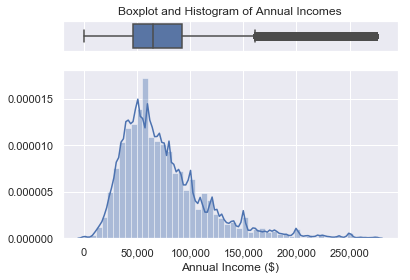

In [5]:
# Histogram with boxplot of annual income
zoom_df = df[df.annual_inc <= 275000]

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)})
sns.boxplot(zoom_df['annual_inc'], ax=ax1).set_title('Boxplot and Histogram of Annual Incomes')
sns.distplot(zoom_df['annual_inc'], axlabel='Annual Income ($)', ax=ax2)

ax1.set(xlabel='')
ax2.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))


In [6]:
# Print summary statistics for annual income, excluding outliers
print('Summary Statistics for Annual Income, Excluding Outliers')
zoom_df.annual_inc.describe().apply("{0:.5f}".format)


Summary Statistics for Annual Income, Excluding Outliers


count    2353659.00000
mean       74582.87520
std        40869.80394
min            0.00000
25%        46000.00000
50%        65000.00000
75%        92000.00000
max       275000.00000
Name: annual_inc, dtype: object

__Findings & Conclusions:__ Almost all borrowers have an annual income of \\$275,000 or lower. This appears reasonable in light of background knowledge. One percent of borrowers have an annual income between \\$275,000 and \\$11,000,000 (dataset maximum). Some of the data in the upper end of these outliers appears erroneous. For example, the dataset contains a borrower who is a waitress with an annual income of \\$61,000,000, as well as an engineer with an annual income of \\$110,000,000. Looking at the distribution of annual incomes, excluding outliers, most borrowers have an annual income between \\$46,000 and \\$92,000.


## Loan Amount

__Questions & Trends Explored:__ I then explored the distribution of loan amounts to understand how much people are borrowing in these peer-to-peer loans.


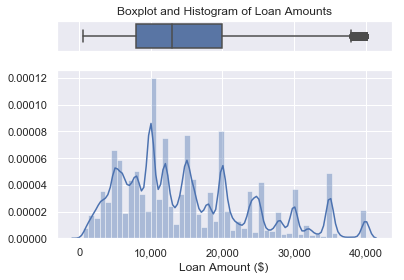

In [7]:
# Histogram with boxplot of loan amount
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)})
sns.boxplot(df['loan_amnt'], ax=ax1).set_title('Boxplot and Histogram of Loan Amounts')
sns.distplot(df['loan_amnt'], axlabel='Loan Amount ($)', ax=ax2)

ax1.set(xlabel='')
ax2.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))


In [8]:
# Print summary statistics for loan amount
print('Summary Statistics for Loan Amount')
df.loan_amnt.describe().apply("{0:.5f}".format)


Summary Statistics for Loan Amount


count    2376343.00000
mean       15126.00002
std         9256.78283
min          500.00000
25%         8000.00000
50%        13000.00000
75%        20000.00000
max        40000.00000
Name: loan_amnt, dtype: object

__Findings & Conclusions:__ There are large spikes at every \\$5,000 increment. This is probably because people tend to borrow even/round amounts. Most borrowers have loans between \\$8,000 and \\$20,000. The maximum is \\$40,000 with no outliers. This is probably a result of Lending Club's policy. 


## Annual Income by Loan Status

__Questions & Trends Explored:__ I wanted to see if there was any relationship between borrowers' annual income and loan status.


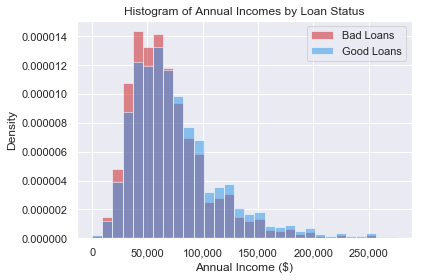

In [9]:
# Overlapping histogram of annual income by loan status
bad_annual_inc = df[(df.annual_inc <= 275000) & (df.status_grp == 'Bad')]
good_annual_inc = df[(df.annual_inc <= 275000) & (df.status_grp == 'Good')]
_ = plt.hist(bad_annual_inc['annual_inc'], alpha=0.5, bins=30, color='#cc181e', label='Bad Loans', density=True)
_ = plt.hist(good_annual_inc['annual_inc'], alpha=0.5, bins=30, color='#2793e8', label='Good Loans', density=True)
_ = plt.title('Histogram of Annual Incomes by Loan Status')
_ = plt.xlabel('Annual Income ($)')
_ = plt.ylabel('Density')
_ = plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
_ = plt.legend(loc='upper right')
plt.show()


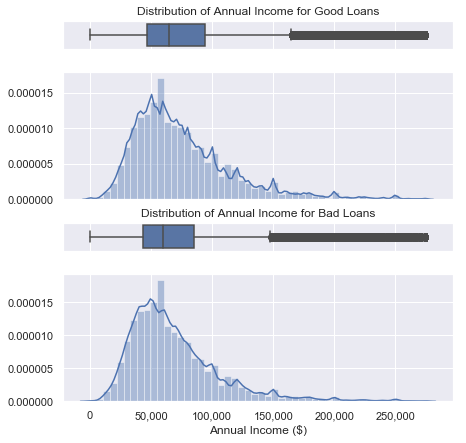

In [10]:
# Histogram with boxplot of annual income by loan status
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(7, 7), 
                                         gridspec_kw={'height_ratios': (0.09, 0.41, 0.09, 0.41)})

sns.boxplot(good_annual_inc['annual_inc'], ax=ax1).set_title('Distribution of Annual Income for Good Loans')
sns.distplot(good_annual_inc['annual_inc'], axlabel='Annual Income ($)', ax=ax2)

sns.boxplot(bad_annual_inc['annual_inc'], ax=ax3).set_title('Distribution of Annual Income for Bad Loans')
sns.distplot(bad_annual_inc['annual_inc'], axlabel='Annual Income ($)', ax=ax4)

ax1.set(xlabel='')
ax3.set(xlabel='')
ax4.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
fig.subplots_adjust(hspace=0.3)

for ax in fig.get_axes():
    ax.label_outer()


In [11]:
# Print summary statistics for annual income by loan status
print('Summary Statistics for Annual Income (Good Loans)')
print(good_annual_inc['annual_inc'].describe().apply("{0:.5f}".format))
print('')
print('Summary Statistics for Annual Income (Bad Loans)')
print(bad_annual_inc['annual_inc'].describe().apply("{0:.5f}".format))


Summary Statistics for Annual Income (Good Loans)
count    2041168.00000
mean       75446.88518
std        41304.91136
min            0.00000
25%        47000.00000
50%        65000.00000
75%        94000.00000
max       275000.00000
Name: annual_inc, dtype: object

Summary Statistics for Annual Income (Bad Loans)
count    312491.00000
mean      68939.22619
std       37417.51786
min           0.00000
25%       43322.50000
50%       60000.00000
75%       85000.00000
max      275000.00000
Name: annual_inc, dtype: object


__Findings & Conclusions:__ A higher proportion of bad loans have annual incomes of \\$70,000 or lower, whereas a higher proportion of good loans have annual incomes above \\$70,000. Most bad loans have annual incomes between \\$43,000 and \\$85,000, whereas most good loans have annual incomes between \\$47,000 and \\$94,000.


## Loan Amount by Loan Status

__Questions & Trends Explored:__ I then wanted to see if there was any relationship between borrowers' loan amounts and loan status.


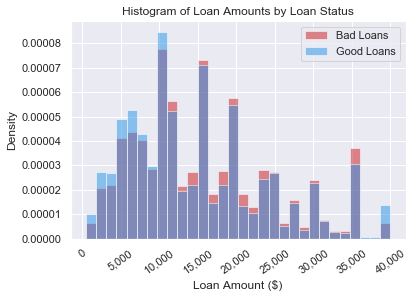

In [12]:
# Overlapping histogram of loan amount by loan status
bad_loan_amnt = df[df.status_grp == 'Bad']
good_loan_amnt = df[df.status_grp == 'Good']
_ = plt.hist(bad_loan_amnt['loan_amnt'], alpha=0.5, bins=30, color='#cc181e', label='Bad Loans', density=True)
_ = plt.hist(good_loan_amnt['loan_amnt'], alpha=0.5, bins=30, color='#2793e8', label='Good Loans', density=True)
_ = plt.title('Histogram of Loan Amounts by Loan Status')
_ = plt.xlabel('Loan Amount ($)')
_ = plt.ylabel('Density')
_ = plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
_ = plt.xticks(rotation=35)
_ = plt.legend(loc='upper right')
plt.show()


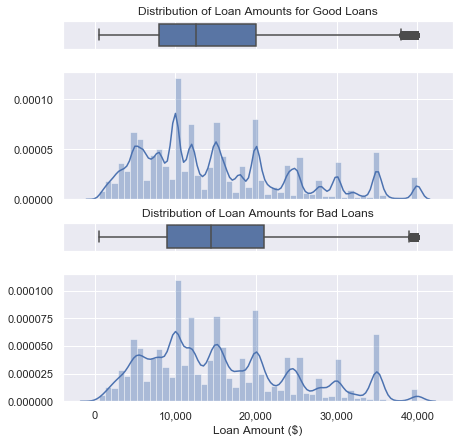

In [13]:
# Histogram with boxplot of loan amount by loan status
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(7, 7), 
                                         gridspec_kw={'height_ratios': (0.09, 0.41, 0.09, 0.41)})

sns.boxplot(good_loan_amnt['loan_amnt'], ax=ax1).set_title('Distribution of Loan Amounts for Good Loans')
sns.distplot(good_loan_amnt['loan_amnt'], axlabel='Loan Amount ($)', ax=ax2)

sns.boxplot(bad_loan_amnt['loan_amnt'], ax=ax3).set_title('Distribution of Loan Amounts for Bad Loans')
sns.distplot(bad_loan_amnt['loan_amnt'], axlabel='Loan Amount ($)', ax=ax4)

ax1.set(xlabel='')
ax3.set(xlabel='')
ax4.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
fig.subplots_adjust(hspace=0.3)

for ax in fig.get_axes():
    ax.label_outer()
    

In [14]:
# Print summary statistics for loan amount by loan status
print('Summary Statistics for Loan Amount (Good Loans)')
print(good_loan_amnt['loan_amnt'].describe().apply("{0:.5f}".format))
print('')
print('Summary Statistics for Loan Amount (Bad Loans)')
print(bad_loan_amnt['loan_amnt'].describe().apply("{0:.5f}".format))


Summary Statistics for Loan Amount (Good Loans)
count    2062071.00000
mean       15031.48748
std         9296.55346
min          500.00000
25%         8000.00000
50%        12600.00000
75%        20000.00000
max        40000.00000
Name: loan_amnt, dtype: object

Summary Statistics for Loan Amount (Bad Loans)
count    314272.00000
mean      15746.13663
std        8966.80427
min         500.00000
25%        9000.00000
50%       14400.00000
75%       21000.00000
max       40000.00000
Name: loan_amnt, dtype: object


__Findings & Conclusions:__ A higher proportion of bad loans have loan amounts of \\$10,000 or higher, whereas a higher proportion of good loans have loan amounts below \\$10,000. Most bad loans have loan amounts between \\$9,000 and \\$21,000, whereas most good loans have loan amounts between \\$8,000 and \\$20,000.


## Debt-to-Income Ratio by Loan Status

__Questions & Trends Explored:__ Hypothesizing that loan status is related to current levels of indebtedness, I explored the relationship between borrowers' debt-to-income ratio and loan status.


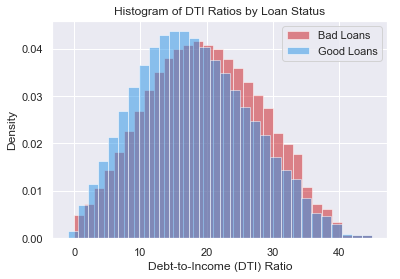

In [15]:
# Overlapping histogram of DTI by loan status
bad_dti = df[(df.dti <= 45) & (df.status_grp == 'Bad')]
good_dti = df[(df.dti <= 45) & (df.status_grp == 'Good')]
_ = plt.hist(bad_dti['dti'], alpha=0.5, bins=30, color='#cc181e', label='Bad Loans', density=True)
_ = plt.hist(good_dti['dti'], alpha=0.5, bins=30, color='#2793e8', label='Good Loans', density=True)
_ = plt.title('Histogram of DTI Ratios by Loan Status')
_ = plt.xlabel('Debt-to-Income (DTI) Ratio')
_ = plt.ylabel('Density')
_ = plt.legend(loc='upper right')
plt.show()


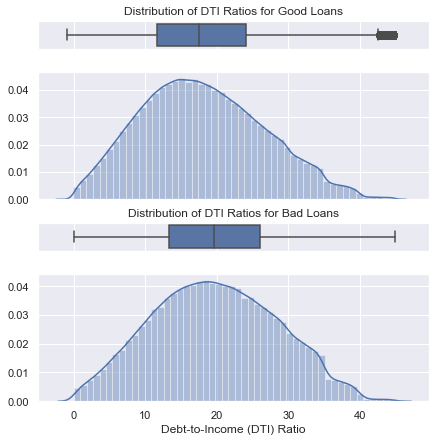

In [16]:
# Histogram with boxplot of DTI by loan status
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(7, 7), 
                                         gridspec_kw={'height_ratios': (0.09, 0.41, 0.09, 0.41)})

sns.boxplot(good_dti['dti'], ax=ax1).set_title('Distribution of DTI Ratios for Good Loans')
sns.distplot(good_dti['dti'], axlabel='Debt-to-Income (DTI) Ratio', ax=ax2)

sns.boxplot(bad_dti['dti'], ax=ax3).set_title('Distribution of DTI Ratios for Bad Loans')
sns.distplot(bad_dti['dti'], axlabel='Debt-to-Income (DTI) Ratio', ax=ax4)

ax1.set(xlabel='')
ax3.set(xlabel='')
ax4.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
fig.subplots_adjust(hspace=0.3)

for ax in fig.get_axes():
    ax.label_outer()
    

__Findings & Conclusions:__ Bad loans have higher debt-to-income (DTI) ratios.


## Revolving Credit Utilization by Loan Status

__Questions & Trends Explored:__ Further testing the hypothesis above, I then explored the relationships between revolving credit utilization (such as credit cards and home equity lines of credit) and loan status.


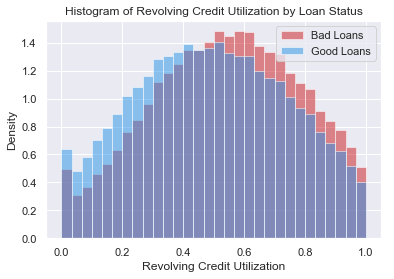

In [17]:
# Overlapping histogram of revolving credit utilization by loan status
bad_revol_util = df[(df.revol_util <= 1) & (df.status_grp == 'Bad')]
good_revol_util = df[(df.revol_util <= 1) & (df.status_grp == 'Good')]
_ = plt.hist(bad_revol_util['revol_util'], alpha=0.5, bins=30, color='#cc181e', label='Bad Loans', density=True)
_ = plt.hist(good_revol_util['revol_util'], alpha=0.5, bins=30, color='#2793e8', label='Good Loans', density=True)
_ = plt.title('Histogram of Revolving Credit Utilization by Loan Status')
_ = plt.xlabel('Revolving Credit Utilization')
_ = plt.ylabel('Density')
_ = plt.legend(loc='upper right')
plt.show()


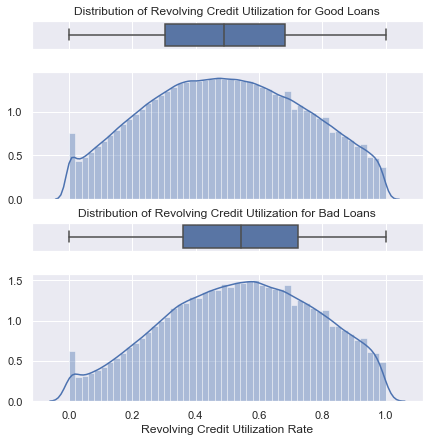

In [18]:
# Histogram with boxplot of revolving credit utilization by loan status
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(7, 7), 
                                         gridspec_kw={'height_ratios': (0.09, 0.41, 0.09, 0.41)})

sns.boxplot(good_revol_util['revol_util'], ax=ax1).set_title('Distribution of Revolving Credit Utilization for Good Loans')
sns.distplot(good_revol_util['revol_util'], axlabel='Revolving Credit Utilization Rate', ax=ax2)

sns.boxplot(bad_revol_util['revol_util'], ax=ax3).set_title('Distribution of Revolving Credit Utilization for Bad Loans')
sns.distplot(bad_revol_util['revol_util'], axlabel='Revolving Credit Utilization Rate', ax=ax4)

ax1.set(xlabel='')
ax3.set(xlabel='')
fig.subplots_adjust(hspace=0.3)

for ax in fig.get_axes():
    ax.label_outer()


__Findings & Conclusions:__ Bad loans have higher revolving credit utilization.


## Revolving Credit History by Loan Status

__Questions & Trends Explored:__ I then explored whether borrowers with bad loans had shorter revolving credit histories, and thus less experience managing credit.


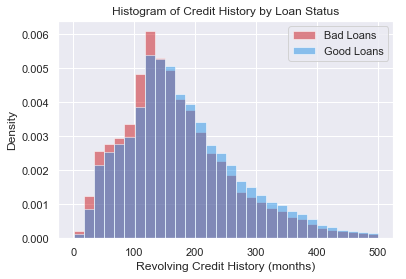

In [19]:
# Overlapping histogram of revolving credit history by loan status
bad_revol_cr_hist = df[(df.mo_sin_old_rev_tl_op <= 500) & (df.status_grp == 'Bad')]
good_revol_cr_hist = df[(df.mo_sin_old_rev_tl_op <= 500) & (df.status_grp == 'Good')]
_ = plt.hist(bad_revol_cr_hist['mo_sin_old_rev_tl_op'], alpha=0.5, bins=30, color='#cc181e', label='Bad Loans', 
             density=True)
_ = plt.hist(good_revol_cr_hist['mo_sin_old_rev_tl_op'], alpha=0.5, bins=30, color='#2793e8', label='Good Loans', 
             density=True)
_ = plt.title('Histogram of Credit History by Loan Status')
_ = plt.xlabel('Revolving Credit History (months)')
_ = plt.ylabel('Density')
_ = plt.legend(loc='upper right')
plt.show()


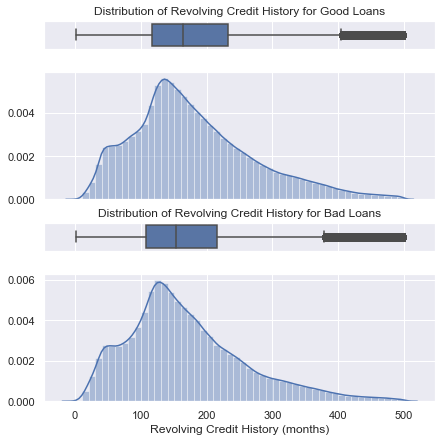

In [20]:
# Histogram with boxplot of revolving credit history by loan status
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(7, 7), 
                                         gridspec_kw={'height_ratios': (0.09, 0.41, 0.09, 0.41)})

sns.boxplot(good_revol_cr_hist['mo_sin_old_rev_tl_op'], 
            ax=ax1).set_title('Distribution of Revolving Credit History for Good Loans')
sns.distplot(good_revol_cr_hist['mo_sin_old_rev_tl_op'], axlabel='Revolving Credit History (months)', ax=ax2)

sns.boxplot(bad_revol_cr_hist['mo_sin_old_rev_tl_op'], 
            ax=ax3).set_title('Distribution of Revolving Credit History for Bad Loans')
sns.distplot(bad_revol_cr_hist['mo_sin_old_rev_tl_op'], axlabel='Revolving Credit History (months)', ax=ax4)

ax1.set(xlabel='')
ax3.set(xlabel='')
fig.subplots_adjust(hspace=0.3)

for ax in fig.get_axes():
    ax.label_outer()
    

__Findings & Conclusions:__ A higher proportion of bad loans have revolving credit histories of 150 months (12.5 years) or less, whereas a higher proportion of good loans have revolving credit histories greater than 150 months.


## Credit Inquiries by Loan Status

__Questions & Trends Explored:__ Since people often apply for more credit to make ends meet as they approach financial distress, I hypothesized that borrowers with bad loans would have a more credit inquiries in the past six months.


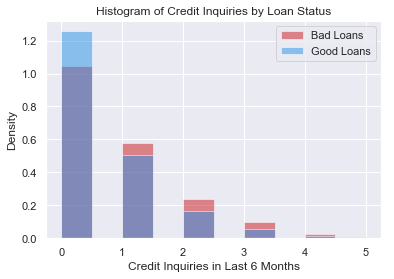

In [21]:
# Overlapping histogram of inquiries in past 6 months by loan status
bad_inquiries = df[(df.inq_last_6mths <= 5) & (df.status_grp == 'Bad')]
good_inquiries = df[(df.inq_last_6mths <= 5) & (df.status_grp == 'Good')]
_ = plt.hist(bad_inquiries['inq_last_6mths'], alpha=0.5, color='#cc181e', label='Bad Loans', density=True)
_ = plt.hist(good_inquiries['inq_last_6mths'], alpha=0.5, color='#2793e8', label='Good Loans', density=True)
_ = plt.title('Histogram of Credit Inquiries by Loan Status')
_ = plt.xlabel('Credit Inquiries in Last 6 Months')
_ = plt.ylabel('Density')
_ = plt.legend(loc='upper right')
plt.show()


__Findings & Conclusions:__ A higher proportion of good loans had zero credit inquiries in the past six months, whereas a higher proportion of bad loans had one or more credit inquiries in the past six months.


## Open Credit Lines by Loan Status

__Questions & Trends Explored:__ Expanding upon the hypothesis above, I examined whether borrowers with bad loans also had more open credit lines.


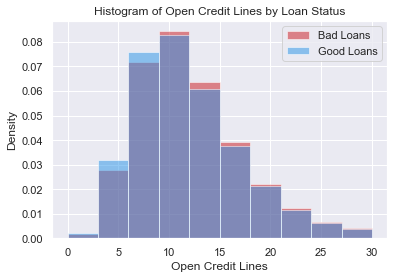

In [22]:
# Overlapping histogram of open credit lines by loan status
bad_open_cr_lines = df[(df.open_acc <= 30) & (df.status_grp == 'Bad')]
good_open_cr_lines = df[(df.open_acc <= 30) & (df.status_grp == 'Good')]
_ = plt.hist(bad_open_cr_lines['open_acc'], alpha=0.5, color='#cc181e', label='Bad Loans', density=True)
_ = plt.hist(good_open_cr_lines['open_acc'], alpha=0.5, color='#2793e8', label='Good Loans', density=True)
_ = plt.title('Histogram of Open Credit Lines by Loan Status')
_ = plt.xlabel('Open Credit Lines')
_ = plt.ylabel('Density')
_ = plt.legend(loc='upper right')
plt.show()


__Findings & Conclusions:__ A higher proportion of good loans had 10 or fewer open credit lines, whereas a higher proportion of bad loans had between 10 and 20 open credit lines.


## Past-Due Delinquencies by Loan Status

__Questions & Trends Explored:__ Hypothesizing that borrowers with bad loans would have a history of delinquencies, I explored the relationship between the number of past-due delinquencies in the past two years and loan status.


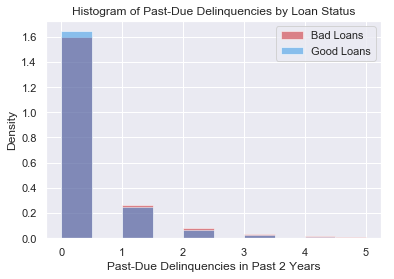

In [23]:
# Overlapping histogram of past-due delinquencies by loan status
bad_delinq = df[(df.delinq_2yrs <= 5) & (df.status_grp == 'Bad')]
good_delinq = df[(df.delinq_2yrs <= 5) & (df.status_grp == 'Good')]
_ = plt.hist(bad_delinq['delinq_2yrs'], alpha=0.5, label='Bad Loans', color='#cc181e', density=True)
_ = plt.hist(good_delinq['delinq_2yrs'], alpha=0.5, label='Good Loans', color='#2793e8', density=True)
_ = plt.title('Histogram of Past-Due Delinquencies by Loan Status')
_ = plt.xlabel('Past-Due Delinquencies in Past 2 Years')
_ = plt.ylabel('Density')
_ = plt.legend(loc='upper right')
plt.show()


__Findings & Conclusions:__ There is a higher proportion of good loans with zero past-due delinquencies in the past two years. However, there was not much difference between the proportions of good loans and bad loans with one or more past-due delinquencies.


## Collections by Loan Status

__Questions & Trends Explored:__ To further explore the hypothesis regarding delinquencies, I explored the relationship between the number of accounts in collections and loan status.


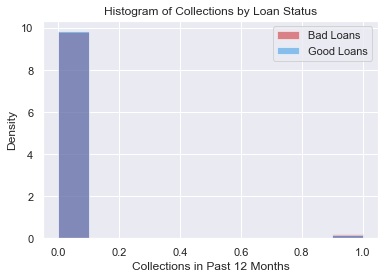

In [24]:
# Overlapping histogram of collections by loan status
bad_collections = df[(df.collections_12_mths_ex_med <= 1) & (df.status_grp == 'Bad')]
good_collections = df[(df.collections_12_mths_ex_med <= 1) & (df.status_grp == 'Good')]
_ = plt.hist(bad_collections['collections_12_mths_ex_med'], alpha=0.5, color='#cc181e', label='Bad Loans', density=True)
_ = plt.hist(good_collections['collections_12_mths_ex_med'], alpha=0.5, color='#2793e8', label='Good Loans', density=True)
_ = plt.title('Histogram of Collections by Loan Status')
_ = plt.xlabel('Collections in Past 12 Months')
_ = plt.ylabel('Density')
_ = plt.legend(loc='upper right')
plt.show()


__Findings & Conclusions:__ There does not seem to be much difference between good loans and bad loans with regards to the number of accounts in collections.


## Borrower Income vs Zip Code Median Income by Loan Status

__Questions & Trends Explored:__ I then hypothesized that borrowers with bad loans tend to overextend themselves in terms of lifestyle spending. To explore this, I looked at the ratio of borrowers' annual income to the median income for their zip code.


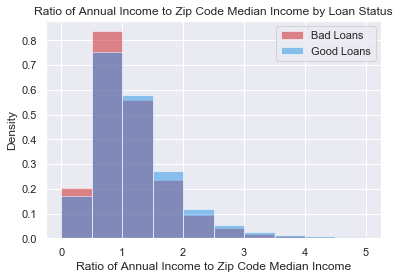

In [25]:
# Overlapping histogram of ratio of annual income to zip code median income by loan status
bad_income_ratio = df[(df.income_vs_peers <= 5) & (df.status_grp == 'Bad')]
good_income_ratio = df[(df.income_vs_peers <= 5) & (df.status_grp == 'Good')]
_ = plt.hist(bad_income_ratio['income_vs_peers'], alpha=0.5, color='#cc181e', label='Bad Loans', density=True)
_ = plt.hist(good_income_ratio['income_vs_peers'], alpha=0.5, color='#2793e8', label='Good Loans', density=True)
_ = plt.title('Ratio of Annual Income to Zip Code Median Income by Loan Status')
_ = plt.xlabel('Ratio of Annual Income to Zip Code Median Income')
_ = plt.ylabel('Density')
_ = plt.legend(loc='upper right')
plt.show()


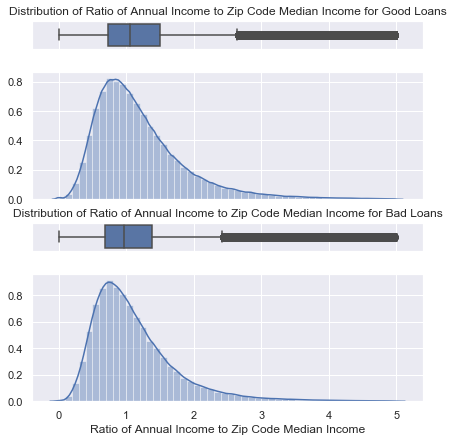

In [26]:
# Histogram with boxplot of ratio of annual income to zip code median income by loan status
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(7, 7), 
                                         gridspec_kw={'height_ratios': (0.09, 0.41, 0.09, 0.41)})

sns.boxplot(good_income_ratio['income_vs_peers'], 
            ax=ax1).set_title('Distribution of Ratio of Annual Income to Zip Code Median Income for Good Loans')
sns.distplot(good_income_ratio['income_vs_peers'], axlabel='Ratio of Annual Income to Zip Code Median Income', ax=ax2)

sns.boxplot(bad_income_ratio['income_vs_peers'], 
            ax=ax3).set_title('Distribution of Ratio of Annual Income to Zip Code Median Income for Bad Loans')
sns.distplot(bad_income_ratio['income_vs_peers'], axlabel='Ratio of Annual Income to Zip Code Median Income', ax=ax4)

ax1.set(xlabel='')
ax3.set(xlabel='')
fig.subplots_adjust(hspace=0.3)

for ax in fig.get_axes():
    ax.label_outer()
    

__Findings & Conclusions:__ A higher proportion of bad loans have a ratio of annual income to zip code median income lower than one, meaning their income is less than their neighbors. Conversely, a higher proportion of good loans have a ratio of annual income to zip code median income greater than one.


## Loan Term by Loan Status

__Questions & Trends Explored:__ Hypothesizing that borrowers with bad loans tend to put off the thought of repayment, I explored whether there were any differences in loan term between borrowers with bad loans and those with good loans.


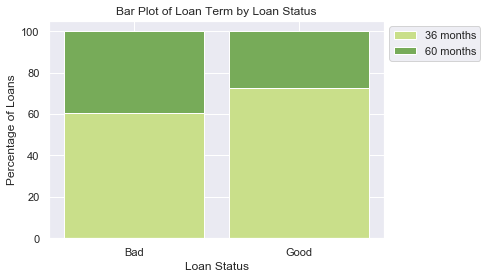

In [27]:
# Create dataframe for stacked bar graph of loan term vs loan status
term_df_indices = ['Bad', 'Good']
term_df_columns = [' 36 months', ' 60 months']
term_df = pd.DataFrame(index=term_df_indices, columns=term_df_columns)
for i in term_df_indices:
    for j in term_df_columns:
        term_df.at[i, j] = len(df[(df.status_grp == i) & (df.term == j)])

# Stacked bar graph of loan term vs loan status
total = [i+j for i,j in zip(term_df[' 36 months'], term_df[' 60 months'])]
light_bars = [i / j * 100 for i, j in zip(term_df[' 36 months'], total)]
medium_bars = [i / j * 100 for i, j in zip(term_df[' 60 months'], total)]

r = [0, 1]
names = ('Bad', 'Good')
barWidth = 0.85
plt.bar(r, light_bars, color='#c9df8a', edgecolor='white', width=barWidth, label='36 months')
plt.bar(r, medium_bars, bottom=light_bars, color='#77ab59', edgecolor='white', width=barWidth, label='60 months')

plt.title('Bar Plot of Loan Term by Loan Status')
plt.xticks(r, names)
plt.xlabel('Loan Status')
plt.ylabel('Percentage of Loans')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()


__Findings & Conclusions:__ A higher proportion of bad loans have a term of 60 months, and conversely, a higher proportion of good loans have a term of 36 months.


## Employment Length by Loan Status

__Questions & Trends Explored:__ I then wanted to see whether there was any relation between employment length and loan status.


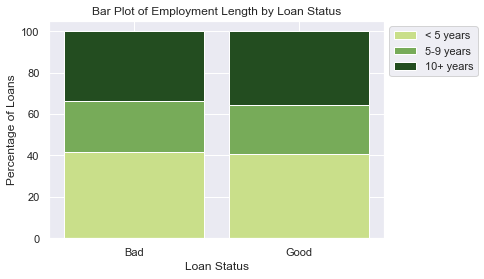

In [28]:
# Create dataframe for stacked bar graph of employment length vs loan status
emp_length_df_indices = ['Bad', 'Good']
emp_length_df_columns = ['< 5 years', '5-9 years', '10+ years']
emp_length_df = pd.DataFrame(index=emp_length_df_indices, columns=emp_length_df_columns)
for i in emp_length_df_indices:
    for j in emp_length_df_columns:
        emp_length_df.at[i, j] = len(df[(df.status_grp == i) & (df.emp_length_grp == j)])

# Stacked bar graph of employment length vs loan status
total = [i+j+k for i,j,k in zip(emp_length_df['< 5 years'], emp_length_df['5-9 years'], emp_length_df['10+ years'])]
light_bars = [i / j * 100 for i, j in zip(emp_length_df['< 5 years'], total)]
medium_bars = [i / j * 100 for i, j in zip(emp_length_df['5-9 years'], total)]
dark_bars = [i / j * 100 for i, j in zip(emp_length_df['10+ years'], total)]

r = [0, 1]
names = ('Bad', 'Good')
barWidth = 0.85
plt.bar(r, light_bars, color='#c9df8a', edgecolor='white', width=barWidth, label='< 5 years')
plt.bar(r, medium_bars, bottom=light_bars, color='#77ab59', edgecolor='white', width=barWidth, label='5-9 years')
plt.bar(r, dark_bars, bottom=[i+j for i,j in zip(light_bars, medium_bars)], color='#234d20', edgecolor='white', 
        width=barWidth, label='10+ years')

plt.title('Bar Plot of Employment Length by Loan Status')
plt.xticks(r, names)
plt.xlabel('Loan Status')
plt.ylabel('Percentage of Loans')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()


__Findings & Conclusions:__ There does not appear to be any significant relationship between employment length and loan status.


## Home Ownership by Loan Status

__Questions & Trends Explored:__ Since home ownership typically entails a great degree of responsibility in managing credit and of consequence for not doing so properly, I explored the relationship between home ownership and loan status.


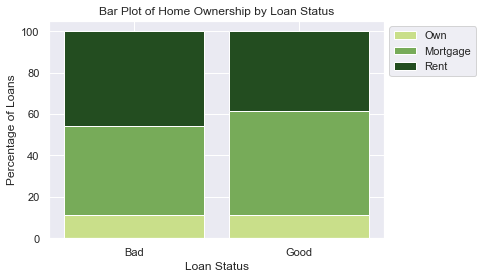

In [29]:
# Create dataframe for stacked bar graph of home ownership vs loan status
home_ownership_df_indices = ['Bad', 'Good']
home_ownership_df_columns = ['OWN', 'MORTGAGE', 'RENT']
home_ownership_df = pd.DataFrame(index=home_ownership_df_indices, columns=home_ownership_df_columns)
for i in home_ownership_df_indices:
    for j in home_ownership_df_columns:
        home_ownership_df.at[i, j] = len(df[(df.status_grp == i) & (df.home_ownership_grp == j)])

# Stacked bar graph of home ownership vs loan status
total = [i+j+k for i,j,k in zip(home_ownership_df['OWN'], home_ownership_df['MORTGAGE'], home_ownership_df['RENT'])]
light_bars = [i / j * 100 for i, j in zip(home_ownership_df['OWN'], total)]
medium_bars = [i / j * 100 for i, j in zip(home_ownership_df['MORTGAGE'], total)]
dark_bars = [i / j * 100 for i, j in zip(home_ownership_df['RENT'], total)]

r = [0, 1]
names = ('Bad', 'Good')
barWidth = 0.85
plt.bar(r, light_bars, color='#c9df8a', edgecolor='white', width=barWidth, label='Own')
plt.bar(r, medium_bars, bottom=light_bars, color='#77ab59', edgecolor='white', width=barWidth, label='Mortgage')
plt.bar(r, dark_bars, bottom=[i+j for i,j in zip(light_bars, medium_bars)], color='#234d20', edgecolor='white', 
        width=barWidth, label='Rent')

plt.title('Bar Plot of Home Ownership by Loan Status')
plt.xticks(r, names)
plt.xlabel('Loan Status')
plt.ylabel('Percentage of Loans')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()


__Findings & Conclusions:__ A higher proportion of borrowers with good loans had a mortgage, whereas a higher proportion of borrowers with bad loans rented their home.


## Application Type by Loan Status

__Questions & Trends Explored:__ Hypothesizing that jointly held loans encourage accountability in maintaining the loans in good standing, I explored the relationship between loan status and whether a loan is held individually or jointly.


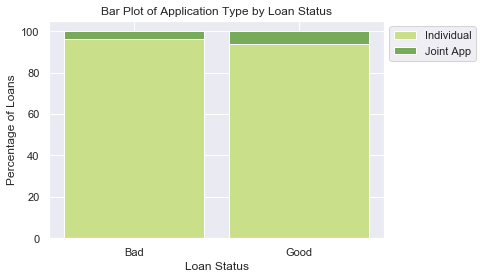

In [30]:
# Create dataframe for stacked bar graph of application type (individual or joint) vs loan status
app_type_df_indices = ['Bad', 'Good']
app_type_df_columns = ['Individual', 'Joint App']
app_type_df = pd.DataFrame(index=app_type_df_indices, columns=app_type_df_columns)
for i in app_type_df_indices:
    for j in app_type_df_columns:
        app_type_df.at[i, j] = len(df[(df.status_grp == i) & (df.application_type == j)])

# Stacked bar graph of application type (individual or joint) vs loan status
total = [i+j for i,j in zip(app_type_df['Individual'], app_type_df['Joint App'])]
light_bars = [i / j * 100 for i, j in zip(app_type_df['Individual'], total)]
medium_bars = [i / j * 100 for i, j in zip(app_type_df['Joint App'], total)]

r = [0, 1]
names = ('Bad', 'Good')
barWidth = 0.85
plt.bar(r, light_bars, color='#c9df8a', edgecolor='white', width=barWidth, label='Individual')
plt.bar(r, medium_bars, bottom=light_bars, color='#77ab59', edgecolor='white', width=barWidth, label='Joint App')

plt.title('Bar Plot of Application Type by Loan Status')
plt.xticks(r, names)
plt.xlabel('Loan Status')
plt.ylabel('Percentage of Loans')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()


__Findings & Conclusions:__ There did not seem to be a significant difference between bad loans and good loans, although a slightly higher percentage of good loans were held jointly.


## Loan Amount vs Annual Income by Loan Status

__Questions & Trends Explored:__ Hypothesizing that borrowers with bad loans would overextend themselves by borrowing more than their peers, I decided to look at the relationship between loan amount and annual income by loan status.


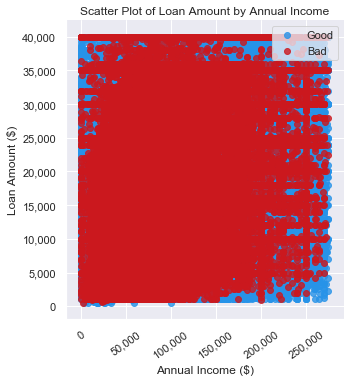

In [31]:
# Scatter plot of annual income vs loan amount
zoom_df = df[df.annual_inc < 275000]
sns.lmplot(x='annual_inc', y='loan_amnt', data=zoom_df, fit_reg=False, hue='status_grp', legend=False, 
          palette=dict(Good='#2793e8', Bad='#cc181e'))
plt.title('Scatter Plot of Loan Amount by Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Amount ($)')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=35)
plt.legend(loc='upper right')
plt.show()


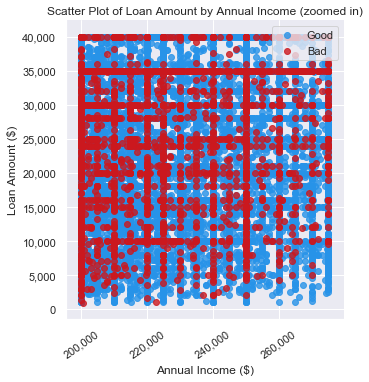

In [32]:
# Zoom in on high annual income in scatter plot above
zoom_df = df[(df.annual_inc >= 200000) & (df.annual_inc <= 275000)]
sns.lmplot(x='annual_inc', y='loan_amnt', data=zoom_df, fit_reg=False, hue='status_grp', legend=False, 
          palette=dict(Good='#2793e8', Bad='#cc181e'))
plt.title('Scatter Plot of Loan Amount by Annual Income (zoomed in)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Amount ($)')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=35)
plt.legend(loc='upper right')
plt.show()


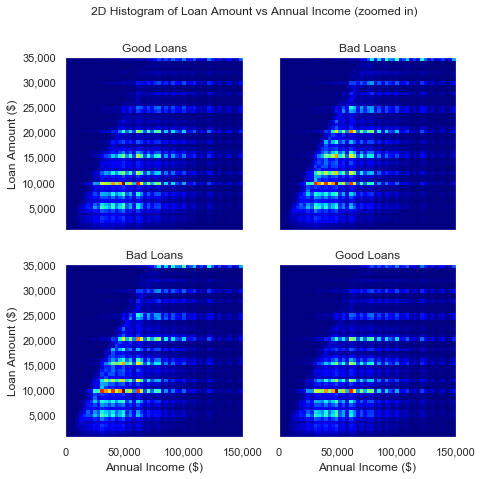

In [33]:
# 2D histogram of loan amount vs annual income
zoom_df_good = df[(df.annual_inc <= 150000) & (df.loan_amnt <= 35000) & (df.status_grp == 'Good')]
zoom_df_bad = df[(df.annual_inc <= 150000) & (df.loan_amnt <= 35000) & (df.status_grp == 'Bad')]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(7, 7))
fig.suptitle('2D Histogram of Loan Amount vs Annual Income (zoomed in)')
fig.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
fig.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax1.hist2d(zoom_df_good.annual_inc, zoom_df_good.loan_amnt, bins=(50, 50), cmap=plt.cm.jet)
ax1.set_title('Good Loans')

ax2.hist2d(zoom_df_bad.annual_inc, zoom_df_bad.loan_amnt, bins=(50, 50), cmap=plt.cm.jet)
ax2.set_title('Bad Loans')

ax3.hist2d(zoom_df_bad.annual_inc, zoom_df_bad.loan_amnt, bins=(50, 50), cmap=plt.cm.jet)
ax3.set_title('Bad Loans')

ax4.hist2d(zoom_df_good.annual_inc, zoom_df_good.loan_amnt, bins=(50, 50), cmap=plt.cm.jet)
ax4.set_title('Good Loans')

for ax in fig.get_axes():
    ax.set(xlabel='Annual Income ($)', ylabel='Loan Amount ($)')
    ax.label_outer()
    
plt.show()


__Findings & Conclusions:__ Higher income borrowers with good loans tend to borrow specific amounts, whereas higher income borrowers with bad loans tend to borrow more round amounts. This could indicate that the higher income borrowers with good loans tend to borrow with specific purchases or spending plans in mind.


## Revolving Credit Utilization vs Revolving Credit History by Loan Status

__Questions & Trends Explored:__ Hypothesizing that borrowers with bad loans would borrow credit more quickly, I explored the relationship between revolving credit utilization and revolving credit history by loan status.


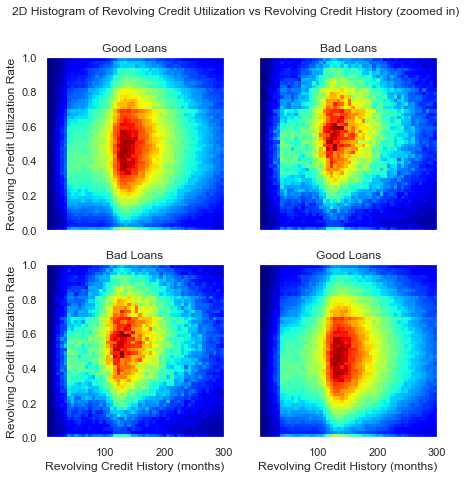

In [34]:
# 2D histogram of revolving credit utilization vs revolving credit history
zoom_df_good = df[(df.mo_sin_old_rev_tl_op <= 300) & (df.revol_util <= 1) & (df.status_grp == 'Good')]
zoom_df_bad = df[(df.mo_sin_old_rev_tl_op <= 300) & (df.revol_util <= 1) & (df.status_grp == 'Bad')]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(7, 7))
fig.suptitle('2D Histogram of Revolving Credit Utilization vs Revolving Credit History (zoomed in)')

ax1.hist2d(zoom_df_good.mo_sin_old_rev_tl_op, zoom_df_good.revol_util, bins=(50, 50), cmap=plt.cm.jet)
ax1.set_title('Good Loans')

ax2.hist2d(zoom_df_bad.mo_sin_old_rev_tl_op, zoom_df_bad.revol_util, bins=(50, 50), cmap=plt.cm.jet)
ax2.set_title('Bad Loans')

ax3.hist2d(zoom_df_bad.mo_sin_old_rev_tl_op, zoom_df_bad.revol_util, bins=(50, 50), cmap=plt.cm.jet)
ax3.set_title('Bad Loans')

ax4.hist2d(zoom_df_good.mo_sin_old_rev_tl_op, zoom_df_good.revol_util, bins=(50, 50), cmap=plt.cm.jet)
ax4.set_title('Good Loans')

for ax in fig.get_axes():
    ax.set(xlabel='Revolving Credit History (months)', ylabel='Revolving Credit Utilization Rate')
    ax.label_outer()
    
plt.show()


__Findings & Conclusions:__ Borrowers with bad loans seem to have higher utilization of revolving credit for the same history than borrowers with good loans.


## Debt-to-Income Ratio vs Revolving Credit History by Loan Status

__Questions & Trends Explored:__ To further explore the hypothesis above, I explored the relationship between debt-to-income ratio and revolving credit history by loan status.


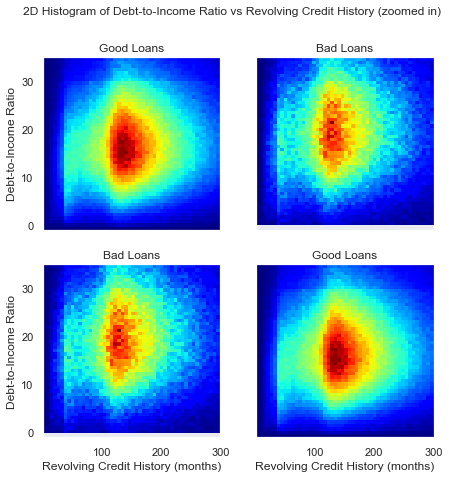

In [35]:
# 2D histogram of DTI vs revolving credit history
zoom_df_good = df[(df.mo_sin_old_rev_tl_op <= 300) & (df.dti <= 35) & (df.status_grp == 'Good')]
zoom_df_bad = df[(df.mo_sin_old_rev_tl_op <= 300) & (df.dti <= 35) & (df.status_grp == 'Bad')]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(7, 7))
fig.suptitle('2D Histogram of Debt-to-Income Ratio vs Revolving Credit History (zoomed in)')

ax1.hist2d(zoom_df_good.mo_sin_old_rev_tl_op, zoom_df_good.dti, bins=(50, 50), cmap=plt.cm.jet)
ax1.set_title('Good Loans')

ax2.hist2d(zoom_df_bad.mo_sin_old_rev_tl_op, zoom_df_bad.dti, bins=(50, 50), cmap=plt.cm.jet)
ax2.set_title('Bad Loans')

ax3.hist2d(zoom_df_bad.mo_sin_old_rev_tl_op, zoom_df_bad.dti, bins=(50, 50), cmap=plt.cm.jet)
ax3.set_title('Bad Loans')

ax4.hist2d(zoom_df_good.mo_sin_old_rev_tl_op, zoom_df_good.dti, bins=(50, 50), cmap=plt.cm.jet)
ax4.set_title('Good Loans')

for ax in fig.get_axes():
    ax.set(xlabel='Revolving Credit History (months)', ylabel='Debt-to-Income Ratio')
    ax.label_outer()
    
plt.show()


__Findings & Conclusions:__ Borrowers with bad loans seem to have higher debt-to-income ratios for the same history than borrowers with good loans.


## Total Current Balance of All Accounts vs Annual Income by Loan Status

__Questions & Trends Explored:__ Hypothesizing that borrowers with bad loans would have higher outstanding balances, I explored the relationship between the current outstanding balance on all accounts and annual income by loan status.


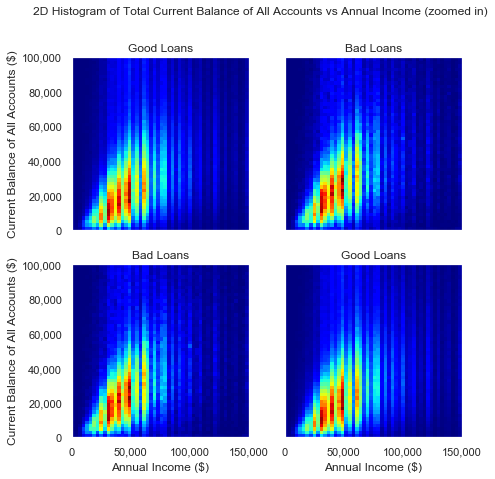

In [36]:
# 2D histogram of total current balance of all accounts vs annual income
zoom_df_good = df[(df.annual_inc <= 150000) & (df.tot_cur_bal <= 100000) & (df.status_grp == 'Good')]
zoom_df_bad = df[(df.annual_inc <= 150000) & (df.tot_cur_bal <= 100000) & (df.status_grp == 'Bad')]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(7, 7))
fig.suptitle('2D Histogram of Total Current Balance of All Accounts vs Annual Income (zoomed in)')
fig.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
fig.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax1.hist2d(zoom_df_good.annual_inc, zoom_df_good.tot_cur_bal, bins=(50, 50), cmap=plt.cm.jet)
ax1.set_title('Good Loans')

ax2.hist2d(zoom_df_bad.annual_inc, zoom_df_bad.tot_cur_bal, bins=(50, 50), cmap=plt.cm.jet)
ax2.set_title('Bad Loans')

ax3.hist2d(zoom_df_bad.annual_inc, zoom_df_bad.tot_cur_bal, bins=(50, 50), cmap=plt.cm.jet)
ax3.set_title('Bad Loans')

ax4.hist2d(zoom_df_good.annual_inc, zoom_df_good.tot_cur_bal, bins=(50, 50), cmap=plt.cm.jet)
ax4.set_title('Good Loans')

for ax in fig.get_axes():
    ax.set(xlabel='Annual Income ($)', ylabel='Current Balance of All Accounts ($)')
    ax.label_outer()
    
plt.show()


__Findings & Conclusions:__ There does not seem to be a significant difference between good loans and bad loans in terms of the relationship between the current outstanding balance on all accounts and annual income.
